## Summary notes

Return the estimate of the trend component of a non-seasonal time series by taking the simple moving average.

Data was sourced from Rdatasets[^1] using StatsModels `Datasets` package.[^2]

Three trend estimates were obtained, using the workflow:
`rolling`[^3] → `mean` → `dropna`

The choice of order must be an odd number.
Too low an order risks *under-smoothing*, meaning much of the irrelavent noise is kept.
Coversely, too high an order risks *over-smoothing*, meaning any subtle (but important) changes in the trend are ironed out 

This topic was covered in M249, Book 2, Part 1.4.

## Dependencies

In [1]:
import pandas as pd
from statsmodels import datasets
from matplotlib import pyplot as plt
import seaborn as sns

Set the graphing defaults.
(This is optional.)

In [2]:
sns.set_theme()

## Main

### Load the data

In [3]:
macrodat = datasets.get_rdataset('Macrodat', package='Ecdat', cache=True)
macrodat.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lhur    168 non-null    float64
 1   punew   168 non-null    float64
 2   fyff    168 non-null    float64
 3   fygm3   168 non-null    float64
 4   fygt1   168 non-null    float64
 5   exruk   168 non-null    float64
 6   gdpjp   162 non-null    float64
dtypes: float64(7)
memory usage: 9.3 KB


### Initialise and plot the time series

Initialise the `Series`.

According to the [documentation](https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Macrodat.html), the initial quarter is the first quarter of 1959.

In [4]:
ts_exruk = pd.Series(
    data=macrodat.data['exruk'].to_numpy(),
    name='exchange rate',
    index=pd.period_range(
        start='1959-01-01',
        periods=macrodat.data['exruk'].size,
        freq='Q',
        name='quarter'
    )
)
ts_exruk.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 168 entries, 1959Q1 to 2000Q4
Freq: Q-DEC
Series name: exchange rate
Non-Null Count  Dtype  
--------------  -----  
168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


Plot the quarterly time series.[^4]

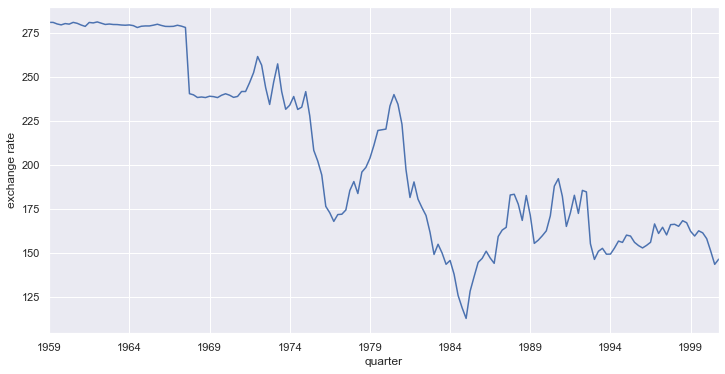

In [5]:
ts_exruk.plot(kind='line', figsize=(12, 6), ylabel=ts_exruk.name)
plt.show()

### Decompose the time series

Try *order* = 5.

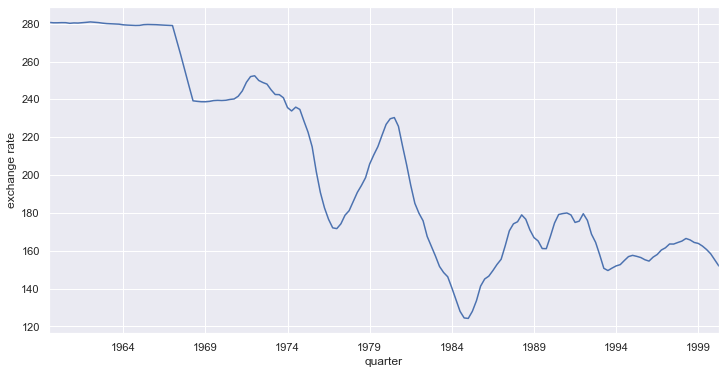

In [6]:
ma5 = ts_exruk.rolling(window=5, center=True).mean().dropna()
_g = ma5.plot(kind='line', figsize=(12, 6), ylabel=ts_exruk.name)
plt.show()

Try *order* = 15.

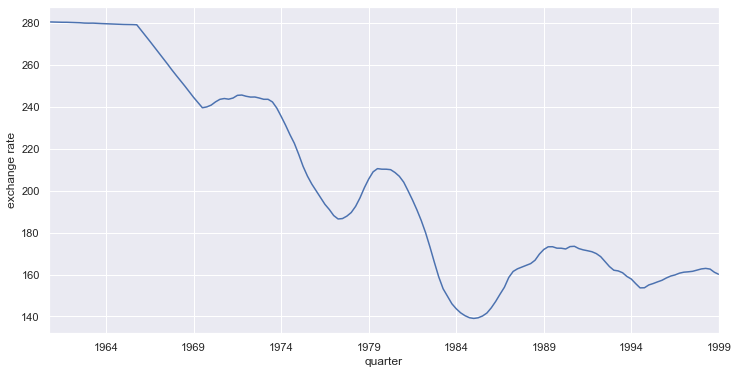

In [7]:
ma15 = ts_exruk.rolling(window=15, center=True).mean().dropna()
_g = ma15.plot(kind='line', figsize=(12, 6), ylabel=ts_exruk.name)
plt.show()

Try *order* = 25.

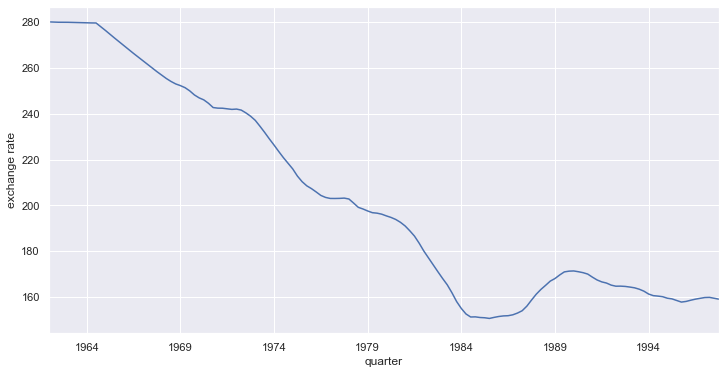

In [8]:
ma25 = ts_exruk.rolling(window=25, center=True).mean().dropna()
_g = ma25.plot(kind='line', figsize=(12, 6), ylabel=ts_exruk.name)
plt.show()

[^1]: Arel-Bundock V (2022). Rdatasets: A collection of datasets originally distributed in various R packages. R package version 1.0.0, https://vincentarelbundock.github.io/Rdatasets
[^2]: See [The Datasets Package](https://www.statsmodels.org/devel/datasets/index.html) (StatsModels)
[^3]: See [pandas.Series.rolling](https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html)
[^4]: At the time of writing, there was an using Seabron to plot a `Series` with a `PeriodIndex`, so we instead use the `plot` method of `Series` for quarterly data.
